In [33]:
# install Microsoft Build Tools für C++
# https://visualstudio.microsoft.com/de/visual-cpp-build-tools/

# install Visual Studio Community 2022
# https://visualstudio.microsoft.com/de/

# pip3 install cytools
# conda install -c conda-forge python-flint
# pip3 install Cython --no-cache-dir --force-reinstall
# pip3 install pplpy --no-cache-dir --force-reinstall
# from cytools import Polytope

import numpy as np
np.random.seed(1234)

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  

plt.rcParams.update(
    {
        "figure.figsize":(8, 8),
        "font.size":16,
    }
)

In [3]:
def sample_lattice(generator_matrix, coefficient_sampler, filter_func, n_draws):
    pts = set()
    for i in range(n_draws):
        n_i = coefficient_sampler()
        lat_pt = np.dot(generator_matrix, n_i)
        if filter_func(lat_pt):
            pts.add(tuple(lat_pt))
    return np.array(list(pts))

In [ ]:
#See https://arxiv.org/pdf/2211.03823.pdf
#Build the polytope
vertices = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[-1,-1,-6,-9]]
p = Polytope(vertices)
print(p)

In [ ]:
#Reflexive Polytopes: https://www.mdpi.com/2073-8994/7/3/1633

In [37]:
#https://www2.mathematik.tu-darmstadt.de/~paffenholz/daten/preprints/20201007_Lattice_Polytopes.pdf
#visualize them

# obtained by p.points()

lattice_points_4d = np.array([
    [ 0, 0, 0, 0],
    [-1, -1, -6, -9],
    [ 0, 0, 0, 1],
    [ 0, 0, 1, 0],
    [ 0, 1, 0, 0],
    [ 1, 0, 0, 0],
    [ 0, 0, -2, -3],
    [ 0, 0, -1, -2],
    [ 0, 0, -1, -1],
    [ 0, 0, 0, -1]])

n_points = lattice_points_4d.shape[0]
dim = lattice_points_4d.shape[1]

lattice_points_2d = lattice_points_4d[0:n_points, 0:2]

new_array = [tuple(row) for row in lattice_points_2d]
uniques = np.unique(new_array, axis=0)

uniques = np.vstack([uniques, uniques[0]])
print(uniques)


[[-1 -1]
 [ 0  0]
 [ 0  1]
 [ 1  0]
 [-1 -1]]


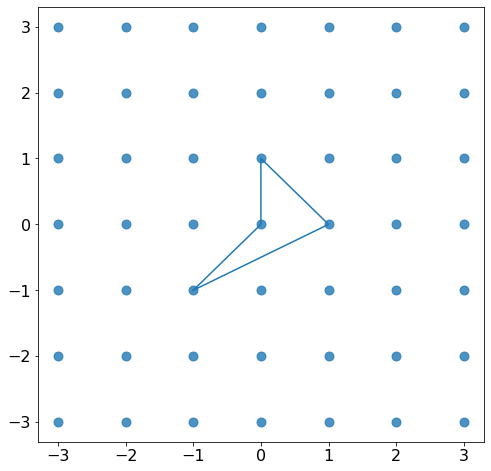

In [38]:
z2_generator = np.eye(2).astype(int)

pts_z2 = sample_lattice(
    z2_generator,
    coefficient_sampler = lambda : np.random.randint(-3, 3+1, (2,)),
    filter_func = lambda x: True,
    n_draws=1000
)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pts_z2[:, 0], pts_z2[:, 1], alpha=0.8, s=80)

x = uniques[:, 0]
y = uniques[:, 1]

line = Line2D(x, y)
ax.add_line(line)

plt.show()